In [2]:
import pandas as pd
df_district=pd.read_excel("ESB_adoption_dataset_v9_update_june_2025.xlsx",sheet_name="1. District-level data")
df_district

,0a. Has committed ESBs?,1a. State,1b. Local Education Agency (LEA) or entity name,1c. LEA ID,1d. Street address 1,1e. Street address 2,1f. City,1g. State,1h. ZIP code,1i. Website,...,5m. Quartile: average rate of asthma,5n. Qualified for American Rescue Plan funding?,5o. EPA 2022 Clean School Bus Rebate Program prioritized school district?,5p. EPA 2023 Clean School Bus Grant & Rebate Programs prioritized school district?,5q. WRI Priority Outreach District (POD)?,6a. Has any expression of interest in ESBs?,6b. ARP 2021 waitlist position,6c. DERA school bus rebates 2020 waitlist position,6d. DERA school bus rebates 2021 waitlist position,6e. Applied for ESB funding but not awarded
0,yes,SOUTH CAROLINA,Abbeville 60,4500690,400 Greenville Street,NaN,Abbeville,SC,29620.0,http://www.acsdsc.org/,...,3.0,No,Yes,No,False,1.0,NaN,NaN,NaN,NaN
1,yes,MISSISSIPPI,ABERDEEN SCHOOL DIST,2800360,1100 W Commerce,NaN,Aberdeen,MS,39730.0,http://www.asdms.us,...,4.0,No,Yes,Yes,True,1.0,NaN,NaN,NaN,NaN
2,no,ALABAMA,Alabama Youth Services,100002,1000 Industrial School Road,NaN,Mt Meigs,AL,36057.0,http://www.dys.alabama.gov/school-district.html,...,NaN,No,No,No,False,1.0,NaN,NaN,NaN,NaN
3,yes,ILLINOIS,A-C Central CUSD 262,1700105,PO Box 260,NaN,Ashland,IL,62612.0,http://www.a-ccentral.com,...,2.0,No,Yes,No,False,1.0,NaN,NaN,NaN,NaN
4,no,ALABAMA,Marshall County,100006,12380 US Highway 431 S,NaN,Guntersville,AL,35976.0,http://www.marshallk12.org,...,3.0,No,Yes,Yes,False,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19512,yes,OHIO,Zenith Academy East,3901396,2261 S Hamilton Rd,NaN,Columbus,OH,43232.0,http://zenithacademy.org/zae.html,...,NaN,No,No,No,False,1.0,NaN,NaN,NaN,2022 CSBP rebate
19513,yes,OHIO,Zenith Academy West,3901576,3385 South Blvd,NaN,Columbus,OH,43204.0,http://zenithacademy.org/zaw.html,...,NaN,No,No,No,False,1.0,NaN,NaN,NaN,NaN
19514,yes,ILLINOIS,Zion-Benton Twp HSD 126,1743890,3901 21st St,NaN,Zion,IL,60099.0,http://www.zbths.org,...,3.0,No,No,No,True,1.0,NaN,NaN,NaN,NaN
19515,yes,CALIFORNIA,Zum Services,06ZUMSE,4919 Tidewater Ave,NaN,Oakland,CA,94601.0,www.ridezum.com,...,NaN,No,No,No,Unknown,1.0,NaN,NaN,NaN,NaN


In [3]:
df_district.columns

Index(['0a. Has committed ESBs?', '1a. State',
       '1b. Local Education Agency (LEA) or entity name', '1c. LEA ID',
       '1d. Street address 1', '1e. Street address 2', '1f. City', '1g. State',
       '1h. ZIP code', '1i. Website', '1j. Has LEA ID?',
       '1k. LEA type (number)', '1l. LEA type (name)',
       '1m. Supervisory union LEA ID', '1n. Locale (full number)',
       '1o. Locale broad type (number)', '1p. Locale broad type (name)',
       '1q. Census Region', '1r. Census Division', '1s. Latitude',
       '1t. Longitude ', '2a. Total number of buses',
       '2b. Contractor used for some or all of buses?',
       '3a. Number of ESBs committed ',
       '3b. Number of delivered or operating ESBs',
       '3c. Number of ESBs awarded', '3d. Number of ESBs ordered',
       '3e. Number of ESBs delivered', '3f. Number of ESBs operating',
       '3g. Number of batches', '3h. Size of batch 1', '3h. Size of batch 2',
       '3h. Size of batch 3', '3h. Size of batch 4', '3h. Size o

In [4]:
totals = {
    "Total committed ESBs": df_district["3a. Number of ESBs committed "].sum(),
    "Awarded ESBs": df_district["3c. Number of ESBs awarded"].sum(),
    "Ordered ESBs": df_district["3d. Number of ESBs ordered"].sum(),
    "Delivered or operating ESBs": df_district["3b. Number of delivered or operating ESBs"].sum(),
    "Students riding ESBs": df_district["4b. Number of students in district"].sum()
}

In [13]:
# ================================
# ESB badges avec filtre par État (State)
# ================================
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# --- Charger les données ---
path = "ESB_adoption_dataset_v9_update_june_2025.xlsx"
df_district = pd.read_excel(path, sheet_name="1. District-level data")

# --- Noms de colonnes utiles ---
COL_STATE          = "1a. State"
COL_TOTAL_BUSES    = "2a. Total number of buses"
COL_COMMITTED      = "3a. Number of ESBs committed "   # (note : espace en fin)
COL_AWARDED        = "3c. Number of ESBs awarded"
COL_ORDERED        = "3d. Number of ESBs ordered"
COL_DELIV_OR_OP    = "3b. Number of delivered or operating ESBs"
COL_OPERATING      = "3f. Number of ESBs operating"
COL_STUDENTS_DIST  = "4b. Number of students in district"

# --- Convertir en numérique ---
for c in [COL_TOTAL_BUSES, COL_COMMITTED, COL_AWARDED, COL_ORDERED, COL_DELIV_OR_OP, COL_OPERATING, COL_STUDENTS_DIST]:
    df_district[c] = pd.to_numeric(df_district[c], errors="coerce")

# --- Préparer estimation "Students riding ESBs" ---
esb_in_service = df_district[COL_OPERATING].fillna(0)
esb_in_service = np.where(esb_in_service > 0, esb_in_service, df_district[COL_DELIV_OR_OP].fillna(0))

students_per_bus = df_district[COL_STUDENTS_DIST] / df_district[COL_TOTAL_BUSES].replace({0: np.nan})
students_per_bus = students_per_bus.fillna(students_per_bus.median()).clip(10, 80)

df_district["Students riding ESBs (est.)"] = np.round(esb_in_service * students_per_bus)

# --- Couleurs des badges ---
COLORS = ["#9e1b1f", "#0f7c89", "#2f9150", "#3352a3", "#8a1a7a"]

LABELS = [
    "Total committed ESBs",
    "Awarded ESBs",
    "Ordered ESBs",
    "Delivered or operating ESBs",
    "Students riding ESBs",
]
VALUE_COLS = [
    COL_COMMITTED,
    COL_AWARDED,
    COL_ORDERED,
    COL_DELIV_OR_OP,
    "Students riding ESBs (est.)",
]

# --- Fonction de calcul des totaux par État ---
def compute_totals(state=None):
    if state is None or state == "All states":
        dff = df_district
    else:
        dff = df_district[df_district[COL_STATE] == state]
    vals = [int(dff[c].fillna(0).sum()) for c in VALUE_COLS]
    return vals

states = ["All states"] + sorted([s for s in df_district[COL_STATE].dropna().unique()])

# --- Création des badges ---
def make_badge_row(values):
    x_positions = [0, 1.25, 2.5, 3.75, 5.0]
    shapes, annots = [], []
    for i, (x, val, label, color) in enumerate(zip(x_positions, values, LABELS, COLORS)):
        shapes.append(dict(type="rect", x0=x, x1=x+1.1, y0=0, y1=1,
                           line=dict(color="rgba(0,0,0,0)"), fillcolor=color))
        shapes.append(dict(type="circle", x0=x-0.05, x1=x+0.15, y0=-0.05, y1=1.05,
                           line=dict(color="rgba(0,0,0,0)"), fillcolor=color))
        shapes.append(dict(type="circle", x0=x+0.95, x1=x+1.15, y0=-0.05, y1=1.05,
                           line=dict(color="rgba(0,0,0,0)"), fillcolor=color))
        annots.append(dict(x=x+0.55, y=0.58, text=f"{val:,.0f}".replace(",", " "),
                           showarrow=False, font=dict(color="white", size=22, family="Arial Black")))
        annots.append(dict(x=x+0.55, y=0.22, text=label, showarrow=False,
                           font=dict(color="white", size=12)))
    return shapes, annots

# --- Données initiales : tous les États ---
init_values = compute_totals("All states")
shapes, annots = make_badge_row(init_values)

fig = go.Figure()
fig.add_trace(go.Scatter(x=[0], y=[0], mode="markers", marker_opacity=0))
fig.update_layout(
    title=dict(text="Committed electric school buses, by adoption status (by State)", x=0.02, y=0.97),
    shapes=shapes,
    annotations=annots,
    xaxis=dict(visible=False, range=[-0.3, 6.2]),
    yaxis=dict(visible=False, range=[-0.2, 1.2]),
    height=200,
    margin=dict(l=20, r=20, t=50, b=20),
    plot_bgcolor="white",
    paper_bgcolor="white",
)

# --- Dropdown pour filtrer par État ---
updatemenus = [
    dict(
        type="dropdown",
        x=0.02, y=1.22, xanchor="left",
        buttons=[
            dict(
                label=state,
                method="update",
                args=(
                    {"visible": [True]},
                    dict(
                        shapes=make_badge_row(compute_totals(state))[0],
                        annotations=make_badge_row(compute_totals(state))[1],
                        title=dict(text=f"Committed electric school buses, by adoption status — {state}")
                    )
                )
            ) for state in states
        ],
        direction="down",
        showactive=True,
        bgcolor="white",
        bordercolor="#ddd"
    )
]
fig.update_layout(updatemenus=updatemenus)

fig.show()




Distribution par tranche de diversité raciale (%):
       Bin  All school buses  Committed ESBs
0    0–10%              18.0            10.1
1   10–20%              17.6             8.9
2   20–30%              14.2            10.3
3   30–50%              22.7            21.9
4  50–100%              27.6            48.7


C:\Users\samda\AppData\Local\Temp\ipykernel_13764\498071006.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_district["Race bin"] = pd.cut(
C:\Users\samda\AppData\Local\Temp\ipykernel_13764\498071006.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df_district.groupby("Race bin")[weight_col].sum().reindex(labels).fillna(0.0)
C:\Users\samda\AppData\Local\Temp\ipykernel_13764\498071006.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current

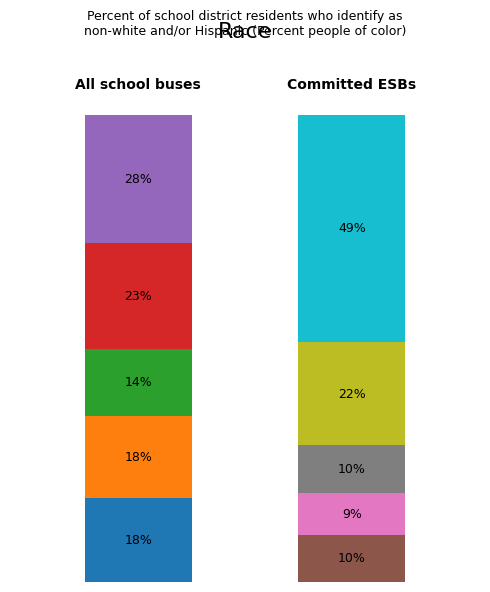

In [6]:

import numpy as np
import matplotlib.pyplot as plt

# --- Charger les données ---


# --- Colonnes utiles ---
col_race = "5b. Percent non-white and/or Hispanic"
col_total_buses = "2a. Total number of buses"
col_committed = "3a. Number of ESBs committed "  # attention : espace à la fin

# --- Nettoyage et conversion ---
for c in [col_race, col_total_buses, col_committed]:
    df_district[c] = pd.to_numeric(df_district[c], errors="coerce")

# Si les pourcentages sont sous forme décimale (ex: 0.45), on les remet en % (ex: 45)
if df_district[col_race].dropna().median() <= 1.0:
    df_district[col_race] = df_district[col_race] * 100.0

# Supprimer les lignes sans données raciales
df_district = df_district.dropna(subset=[col_race])

# --- Définir les tranches de diversité (bins) ---
bins = [0, 10, 20, 30, 50, 100]
labels = ["0–10%", "10–20%", "20–30%", "30–50%", "50–100%"]

df_district["Race bin"] = pd.cut(
    df_district[col_race].clip(0, 100),
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=True
)

# --- Fonction pour calculer la part pondérée ---
def weighted_share(weight_col):
    """
    Calcule la distribution (%) des bus selon les tranches de diversité raciale,
    pondérée par le nombre de bus (ou ESB) dans chaque district.
    """
    g = df_district.groupby("Race bin")[weight_col].sum().reindex(labels).fillna(0.0)
    total = g.sum()
    return (g / total * 100.0) if total > 0 else g

share_all_buses = weighted_share(col_total_buses)
share_committed = weighted_share(col_committed)

# --- Vérifier la distribution dans la console ---
print("\nDistribution par tranche de diversité raciale (%):")
print(pd.DataFrame({
    "Bin": labels,
    "All school buses": share_all_buses.round(1).values,
    "Committed ESBs": share_committed.round(1).values
}))

# --- Création du graphique ---
fig, ax = plt.subplots(figsize=(5, 6))

def draw_stacked(x, shares, label):
    bottom = 0
    for s in shares:
        ax.bar(x, s, bottom=bottom, width=0.5)
        if s >= 3:  # afficher le % si le bloc est assez grand
            ax.text(x, bottom + s/2, f"{round(s):.0f}%", ha="center", va="center", fontsize=9)
        bottom += s
    ax.text(x, 105, label, ha="center", va="bottom", fontsize=10, fontweight="bold")

# Dessiner les deux colonnes
draw_stacked(0, share_all_buses.values, "All school buses")
draw_stacked(1, share_committed.values, "Committed ESBs")

# Titres et style
ax.set_title("Race", fontsize=16, pad=15)
ax.text(
    0.5, 1.04,
    "Percent of school district residents who identify as\nnon-white and/or Hispanic (Percent people of color)",
    ha="center", va="bottom", transform=ax.transAxes, fontsize=9
)
ax.set_xlim(-0.6, 1.6)
ax.set_ylim(0, 112)
ax.set_xticks([]); ax.set_yticks([])
for side in ["top", "right", "left", "bottom"]:
    ax.spines[side].set_visible(False)

plt.tight_layout()

# --- Enregistrer le graphique ---
plt.savefig("kpi2_race_stacked.png", dpi=200, bbox_inches="tight")
plt.show()


C:\Users\samda\AppData\Local\Temp\ipykernel_13764\1664398076.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_district[c] = pd.to_numeric(df_district[c], errors="coerce")
C:\Users\samda\AppData\Local\Temp\ipykernel_13764\1664398076.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df_district.groupby("Race bin")[weight_col].sum().reindex(labels).fillna(0.0)
C:\Users\samda\AppData\Local\Temp\ipykernel_13764\1664398076.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass


Distribution par tranche de diversité raciale (%):
       Bin  All school buses  Committed ESBs
0    0–10%              18.0            10.1
1   10–20%              17.6             8.9
2   20–30%              14.2            10.3
3   30–50%              22.7            21.9
4  50–100%              27.6            48.7


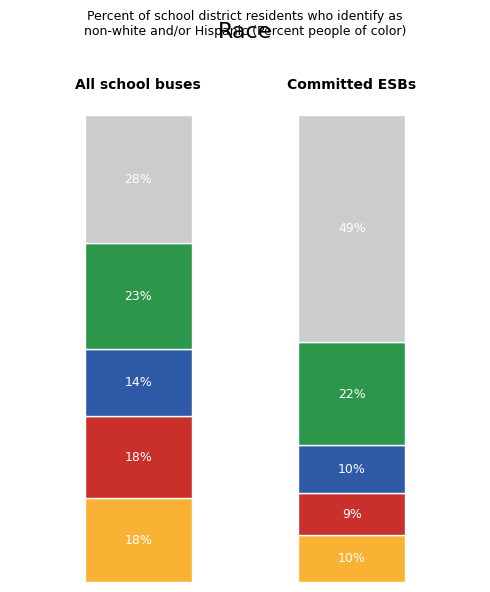

In [7]:
# === KPI 2 : Race Equity Chart (avec df_district) ===



# --- Colonnes utiles ---
col_race = "5b. Percent non-white and/or Hispanic"
col_total_buses = "2a. Total number of buses"
col_committed = "3a. Number of ESBs committed "  # attention : espace à la fin

# --- Nettoyage ---
for c in [col_race, col_total_buses, col_committed]:
    df_district[c] = pd.to_numeric(df_district[c], errors="coerce")

# Si les % sont exprimés entre 0 et 1, on les remet sur 0–100
if df_district[col_race].dropna().median() <= 1.0:
    df_district[col_race] = df_district[col_race] * 100.0

# Supprimer les lignes sans données raciales
df_district = df_district.dropna(subset=[col_race])

# --- Tranches de diversité raciale ---
bins = [0, 10, 20, 30, 50, 100]
labels = ["0–10%", "10–20%", "20–30%", "30–50%", "50–100%"]
df_district["Race bin"] = pd.cut(
    df_district[col_race].clip(0, 100),
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=True
)

# --- Fonction pour le calcul pondéré ---
def weighted_share(weight_col):
    """
    Calcule la distribution (%) des bus selon les tranches de diversité raciale,
    pondérée par le nombre de bus (ou ESB) dans chaque district.
    """
    g = df_district.groupby("Race bin")[weight_col].sum().reindex(labels).fillna(0.0)
    total = g.sum()
    return (g / total * 100.0) if total > 0 else g

share_all_buses = weighted_share(col_total_buses)
share_committed = weighted_share(col_committed)

# --- Palette de couleurs (du bas vers le haut) ---
colors = ["#f9b233", "#c9302c", "#2e5aa7", "#2c974b", "#cccccc"]
# jaune, rouge, bleu, vert, gris clair

# --- Vérification console ---
print("\nDistribution par tranche de diversité raciale (%):")
print(pd.DataFrame({
    "Bin": labels,
    "All school buses": share_all_buses.round(1).values,
    "Committed ESBs": share_committed.round(1).values
}))

# --- Création du graphique ---
fig, ax = plt.subplots(figsize=(5, 6))

def draw_stacked(x, shares, label, colors):
    bottom = 0
    for s, color in zip(shares, colors):
        ax.bar(x, s, bottom=bottom, width=0.5, color=color, edgecolor="white")
        if s >= 3:
            ax.text(x, bottom + s/2, f"{round(s):.0f}%", ha="center", va="center", fontsize=9, color="white")
        bottom += s
    ax.text(x, 105, label, ha="center", va="bottom", fontsize=10, fontweight="bold")

# Dessiner les deux colonnes
draw_stacked(0, share_all_buses.values, "All school buses", colors)
draw_stacked(1, share_committed.values, "Committed ESBs", colors)

# --- Titre et style ---
ax.set_title("Race", fontsize=16, pad=15)
ax.text(
    0.5, 1.04,
    "Percent of school district residents who identify as\nnon-white and/or Hispanic (Percent people of color)",
    ha="center", va="bottom", transform=ax.transAxes, fontsize=9
)
ax.set_xlim(-0.6, 1.6)
ax.set_ylim(0, 112)
ax.set_xticks([]); ax.set_yticks([])
for side in ["top", "right", "left", "bottom"]:
    ax.spines[side].set_visible(False)

plt.tight_layout()

# --- Enregistrer ---
plt.savefig("kpi2_race_stacked_df_district.png", dpi=200, bbox_inches="tight")
plt.show()


C:\Users\samda\AppData\Local\Temp\ipykernel_13764\2890329037.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df_district.groupby("PM2.5 bin")[weight_col].sum().reindex(labels).fillna(0.0)
C:\Users\samda\AppData\Local\Temp\ipykernel_13764\2890329037.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df_district.groupby("PM2.5 bin")[weight_col].sum().reindex(labels).fillna(0.0)



Distribution par tranches PM2.5 (%):
  Tranche  All school buses  Committed ESBs
0     0–5               4.0             3.9
1     5–7              15.9            17.0
2     7–9              53.9            51.2
3    9–12              26.2            27.9
4     12+               0.0             0.0


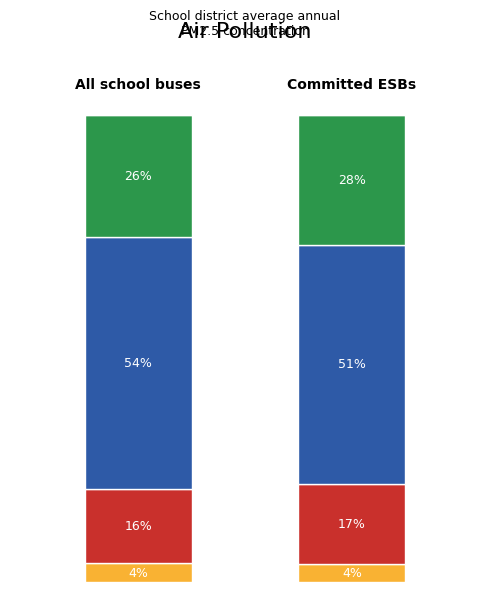

In [8]:
# --- Colonnes utiles dans df_district ---
col_pm25         = "5f. PM2.5 concentration"
col_total_buses  = "2a. Total number of buses"
col_committed    = "3a. Number of ESBs committed "  # (il y a un espace à la fin)

# --- Sélection / nettoyage ---
for c in [col_pm25, col_total_buses, col_committed]:
    df_district[c] = pd.to_numeric(df_district[c], errors="coerce")

df_district = df_district.dropna(subset=[col_pm25])

# --- Définir les tranches PM2.5 (adapte si tu veux d'autres bornes) ---
# Exemple proche du rendu fourni : très faible, faible, modérée, élevée, très élevée
bins   = [0, 5, 7, 9, 12, np.inf]
labels = ["0–5", "5–7", "7–9", "9–12", "12+"]

df_district["PM2.5 bin"] = pd.cut(
    df_district[col_pm25].clip(lower=0),
    bins=bins, labels=labels, include_lowest=True, right=False
)

# --- Fonction de distribution pondérée (% des bus par tranche) ---
def weighted_share(weight_col):
    g = df_district.groupby("PM2.5 bin")[weight_col].sum().reindex(labels).fillna(0.0)
    total = g.sum()
    return (g / total * 100.0) if total > 0 else g

share_all_buses = weighted_share(col_total_buses)
share_committed = weighted_share(col_committed)

# --- (Optionnel) Afficher la table de contrôle ---
print("\nDistribution par tranches PM2.5 (%):")
print(pd.DataFrame({
    "Tranche": labels,
    "All school buses": share_all_buses.round(1).values,
    "Committed ESBs": share_committed.round(1).values
}))

# --- Palette (bas -> haut) pour rappeler ton visuel ---
# jaune (faible), rouge, bleu, vert, gris (très élevée)
colors = ["#f9b233", "#c9302c", "#2e5aa7", "#2c974b", "#cccccc"]

# --- Tracé ---
fig, ax = plt.subplots(figsize=(5, 6))

def draw_stacked(x, shares, label, colors):
    bottom = 0
    for s, color in zip(shares, colors):
        ax.bar(x, s, bottom=bottom, width=0.5, color=color, edgecolor="white")
        if s >= 3:
            ax.text(x, bottom + s/2, f"{round(s):.0f}%", ha="center", va="center", fontsize=9, color="white")
        bottom += s
    ax.text(x, 105, label, ha="center", va="bottom", fontsize=10, fontweight="bold")

draw_stacked(0, share_all_buses.values, "All school buses", colors)
draw_stacked(1, share_committed.values, "Committed ESBs", colors)

# Titres / style (reprend la mise en page du KPI 3)
ax.set_title("Air Pollution", fontsize=16, pad=15)
ax.text(
    0.5, 1.04,
    "School district average annual\nPM2.5 concentration",
    ha="center", va="bottom", transform=ax.transAxes, fontsize=9
)
ax.set_xlim(-0.6, 1.6)
ax.set_ylim(0, 112)
ax.set_xticks([]); ax.set_yticks([])
for side in ["top", "right", "left", "bottom"]:
    ax.spines[side].set_visible(False)

plt.tight_layout()
plt.savefig("kpi3_pm25_stacked_df_district.png", dpi=200, bbox_inches="tight")
plt.show()

C:\Users\samda\AppData\Local\Temp\ipykernel_13764\735010008.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df_district.groupby("Low-income bin")[weight_col].sum().reindex(labels).fillna(0.0)
C:\Users\samda\AppData\Local\Temp\ipykernel_13764\735010008.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df_district.groupby("Low-income bin")[weight_col].sum().reindex(labels).fillna(0.0)



Distribution par tranches de bas revenus (%):
   Tranche  All school buses  Committed ESBs
0    0–10%               2.1             1.6
1   10–20%              19.1            18.2
2   20–30%              31.8            24.3
3   30–50%              43.9            51.7
4  50–100%               3.1             4.3


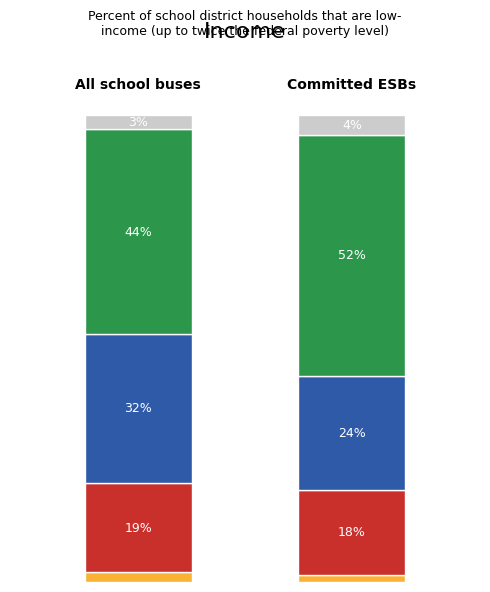

In [9]:
col_low_income   = "5d. Percent low-income (200% of federal poverty level)"
col_total_buses  = "2a. Total number of buses"
col_committed    = "3a. Number of ESBs committed "   # (attention : espace final)

# --- Nettoyage ---
for c in [col_low_income, col_total_buses, col_committed]:
    df_district[c] = pd.to_numeric(df_district[c], errors="coerce")

# Si la variable est sur 0–1, on la remet en pourcentage
if df_district[col_low_income].dropna().median() <= 1.0:
    df_district[col_low_income] = df_district[col_low_income] * 100.0

# On garde les lignes avec info de revenu
df_district = df_district.dropna(subset=[col_low_income])

# --- Tranches (% de ménages bas revenus) ---
bins   = [0, 10, 20, 30, 50, 100]
labels = ["0–10%", "10–20%", "20–30%", "30–50%", "50–100%"]

df_district["Low-income bin"] = pd.cut(
    df_district[col_low_income].clip(0, 100),
    bins=bins, labels=labels, include_lowest=True, right=True
)

# --- Fonction de distribution pondérée (% des bus par tranche) ---
def weighted_share(weight_col):
    g = df_district.groupby("Low-income bin")[weight_col].sum().reindex(labels).fillna(0.0)
    total = g.sum()
    return (g / total * 100.0) if total > 0 else g

share_all_buses = weighted_share(col_total_buses)
share_committed = weighted_share(col_committed)

# --- Palette (bas -> haut), pour matcher tes KPI précédents ---
colors = ["#f9b233", "#c9302c", "#2e5aa7", "#2c974b", "#cccccc"]
# jaune, rouge, bleu, vert, gris clair

# (Optionnel) Aperçu console
print("\nDistribution par tranches de bas revenus (%):")
print(pd.DataFrame({
    "Tranche": labels,
    "All school buses": share_all_buses.round(1).values,
    "Committed ESBs": share_committed.round(1).values
}))

# --- Tracé ---
fig, ax = plt.subplots(figsize=(5, 6))

def draw_stacked(x, shares, label, colors):
    bottom = 0
    for s, color in zip(shares, colors):
        ax.bar(x, s, bottom=bottom, width=0.5, color=color, edgecolor="white")
        if s >= 3:
            ax.text(x, bottom + s/2, f"{round(s):.0f}%", ha="center", va="center", fontsize=9, color="white")
        bottom += s
    ax.text(x, 105, label, ha="center", va="bottom", fontsize=10, fontweight="bold")

draw_stacked(0, share_all_buses.values, "All school buses", colors)
draw_stacked(1, share_committed.values, "Committed ESBs", colors)

# Titres & style (comme ton exemple)
ax.set_title("Income", fontsize=16, pad=15)
ax.text(
    0.5, 1.04,
    "Percent of school district households that are low-\nincome (up to twice the federal poverty level)",
    ha="center", va="bottom", transform=ax.transAxes, fontsize=9
)
ax.set_xlim(-0.6, 1.6)
ax.set_ylim(0, 112)
ax.set_xticks([]); ax.set_yticks([])
for side in ["top","right","left","bottom"]:
    ax.spines[side].set_visible(False)

plt.tight_layout()
plt.savefig("kpi4_income_lowincome_stacked_df_district.png", dpi=200, bbox_inches="tight")
plt.show()